<h1 style="color:#2E86C1; text-align:center;"> Group 43 - Advanced Deep Learning</h1>
<h2 style="color:#117864;">📘 Assignment 01: Contributions</h2>

<table style="border-collapse: collapse; width: 100%; font-size: 16px;">
  <thead>
    <tr style="background-color: #D6EAF8;">
      <th style="border: 1px solid #ABB2B9; padding: 8px;">👤 Name</th>
      <th style="border: 1px solid #ABB2B9; padding: 8px;">🆔 BITS ID</th>
      <th style="border: 1px solid #ABB2B9; padding: 8px;">📈 Contribution</th>
    </tr>
  </thead>
  <tbody>
    <tr style="background-color: #FDFEFE;">
      <td style="border: 1px solid #ABB2B9; padding: 8px;">SUBHRANSU MISHRA</td>
      <td style="border: 1px solid #ABB2B9; padding: 8px;">2023AC05489</td>
      <td style="border: 1px solid #ABB2B9; padding: 8px;">✅ 100%</td>
    </tr>
    <tr style="background-color: #F8F9F9;">
      <td style="border: 1px solid #ABB2B9; padding: 8px;">DULAL DAS</td>
      <td style="border: 1px solid #ABB2B9; padding: 8px;">2023AC05041</td>
      <td style="border: 1px solid #ABB2B9; padding: 8px;">✅ 100%</td>
    </tr>
    <tr style="background-color: #FDFEFE;">
      <td style="border: 1px solid #ABB2B9; padding: 8px;">JAWAHARLAL RAJAN S </td>
      <td style="border: 1px solid #ABB2B9; padding: 8px;">2023AC05504</td>
      <td style="border: 1px solid #ABB2B9; padding: 8px;">✅ 100%</td>
    </tr>
    <tr style="background-color: #F8F9F9;">
      <td style="border: 1px solid #ABB2B9; padding: 8px;">SHAILESH KUMAR SINGH</td>
      <td style="border: 1px solid #ABB2B9; padding: 8px;">2023AC05475</td>
      <td style="border: 1px solid #ABB2B9; padding: 8px;">✅ 100%</td>
    </tr>
  </tbody>
</table>

<p style="text-align:center; font-size: 14px; color:gray; margin-top:20px;">
📝 Each member contributed equally towards the completion of this assignment.
</p>



<div style="
    background-color: #f0f8ff;
    border-left: 4px solid #2E86C1;
    padding: 12px;
    margin-top: 15px;
    font-family: sans-serif;
">
    <h3 style="color: #2E86C1; margin-top: 0;">Task 1: Standard PCA vs Randomized PCA on CIFAR-10</h3>
    <p style="color: #2C3E50; font-size: 14px;">
        Compare the performance of <strong>Standard PCA</strong> and <strong>Randomized PCA</strong> on the grayscale version of the CIFAR-10 dataset. 
        Retain 95% variance, train a <code>LogisticRegression</code> model, and visualize results using ROC curves. 
        Discuss differences in speed and classification accuracy.
    </p>
</div>

<div>Goal:
Convert CIFAR-10 to grayscale.

Use 70% for training and 30% for testing.

Perform Standard PCA and Randomized PCA (retain 95% variance).

Train logistic regression classifiers on both.

Evaluate on test set using ROC curve (One-vs-Rest for 10 classes).</div>

<b>Step 1: Import Libraries & Load CIFAR-10 (Grayscale)</b>

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10
from skimage.color import rgb2gray

import warnings
warnings.filterwarnings('ignore')

<b>Step 2: Load CIFAR-10, Convert to Grayscale, Normalize</b>

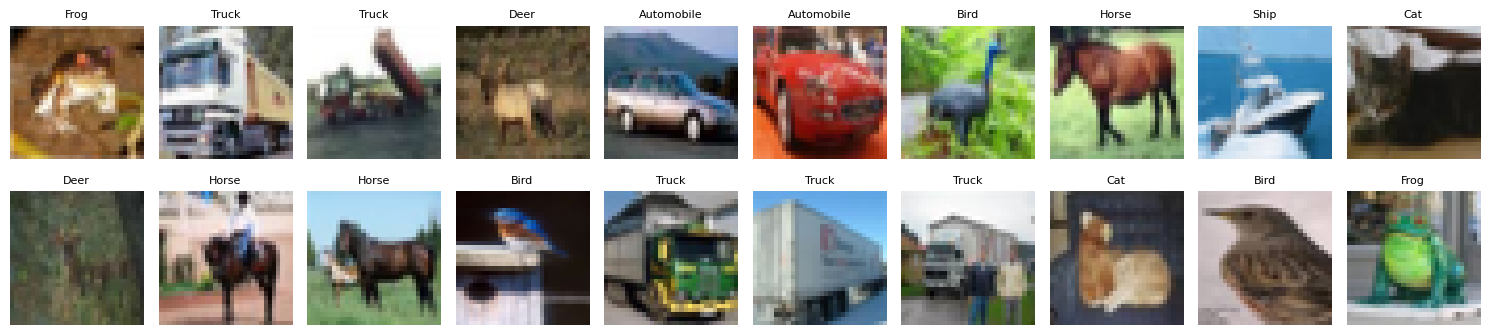

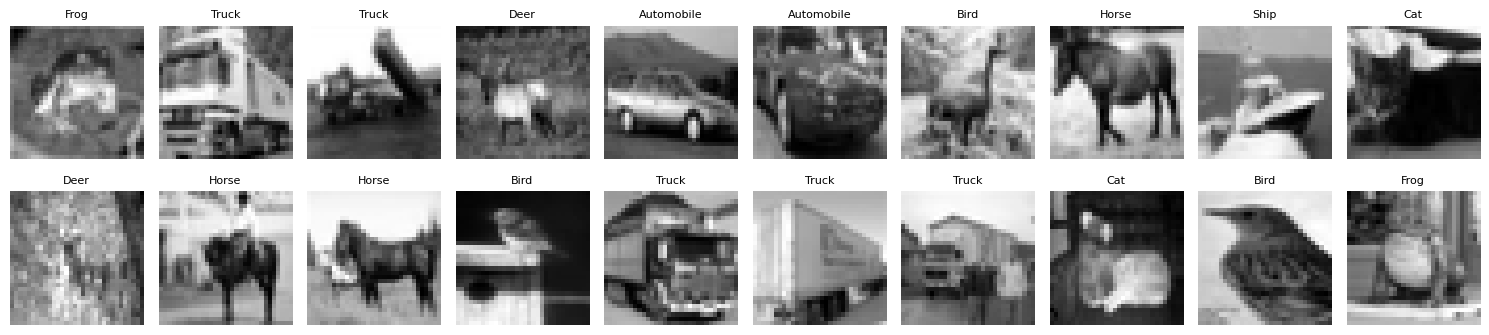

In [88]:

# Load CIFAR-10 data
(x_train_full, y_train_full), (x_test_full, y_test_full) = cifar10.load_data()

# Class names for CIFAR-10
class_names = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]

# Function to show sample images
def show_sample_images(images, labels, class_names=None, n=20, per_row=10, grayscale=False):
    rows = n // per_row + int(n % per_row != 0)
    plt.figure(figsize=(per_row * 1.5, rows * 1.8))

    for i in range(n):
        plt.subplot(rows, per_row, i + 1)
        if grayscale:
            plt.imshow(images[i], cmap='gray')
        else:
            plt.imshow(images[i])
        label = int(labels[i]) if isinstance(labels[i], (np.ndarray, list)) else labels[i]
        title = f"{label}" if not class_names else class_names[label]
        plt.title(title, fontsize=8)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Show 20 original color images
show_sample_images(x_train_full, y_train_full, class_names, n=20, per_row=10)

# Combine for unified split
X = np.concatenate((x_train_full, x_test_full), axis=0)
y = np.concatenate((y_train_full, y_test_full), axis=0).flatten()

# Convert to grayscale
X_gray = np.array([rgb2gray(img) for img in X])
X_flat = X_gray.reshape((X_gray.shape[0], -1))  # Flatten to (n_samples, n_features)

# Show same 20 images as grayscale
show_sample_images(X_gray, y, class_names, n=20, per_row=10, grayscale=True)

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flat)


<b>Step 3: Train-Test Split (70% train / 30% test)</b>

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)

<b>Step 4: Perform Standard PCA (95% variance retention)</b>

In [90]:
pca_std = PCA(n_components=0.95, svd_solver='full')
X_train_pca_std = pca_std.fit_transform(X_train)
X_test_pca_std = pca_std.transform(X_test)

print(f"Standard PCA Components: {X_train_pca_std.shape[1]}")


Standard PCA Components: 163


<b>Step 5: Train Logistic Regression on Standard PCA output</b>

In [91]:
clf_std = LogisticRegression(max_iter=1000)
clf_std.fit(X_train_pca_std, y_train)
y_score_std = clf_std.predict_proba(X_test_pca_std)


<b>Step 6: Perform Randomized PCA (TruncatedSVD)</b>

In [92]:
pca_rand = TruncatedSVD(n_components=X_train_pca_std.shape[1], random_state=42)
X_train_pca_rand = pca_rand.fit_transform(X_train)
X_test_pca_rand = pca_rand.transform(X_test)

print(f"Randomized PCA Components: {X_train_pca_rand.shape[1]}")


Randomized PCA Components: 163


<b>Step 7: Train Logistic Regression on Randomized PCA</b>

In [93]:
clf_rand = LogisticRegression(max_iter=1000)
clf_rand.fit(X_train_pca_rand, y_train)
y_score_rand = clf_rand.predict_proba(X_test_pca_rand)


<b>Step 8: Plot ROC Curves (One-vs-Rest)</b>

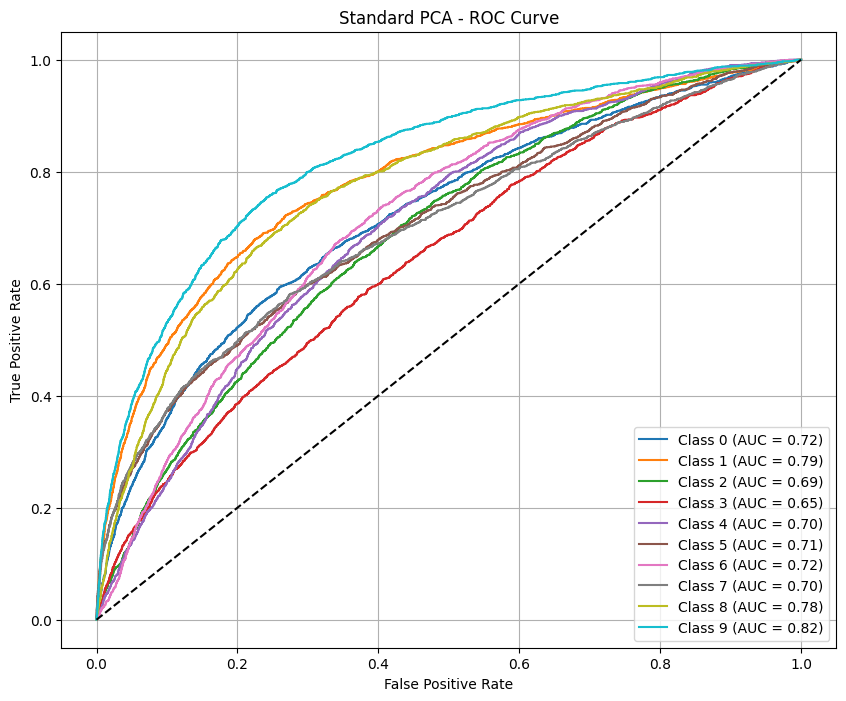

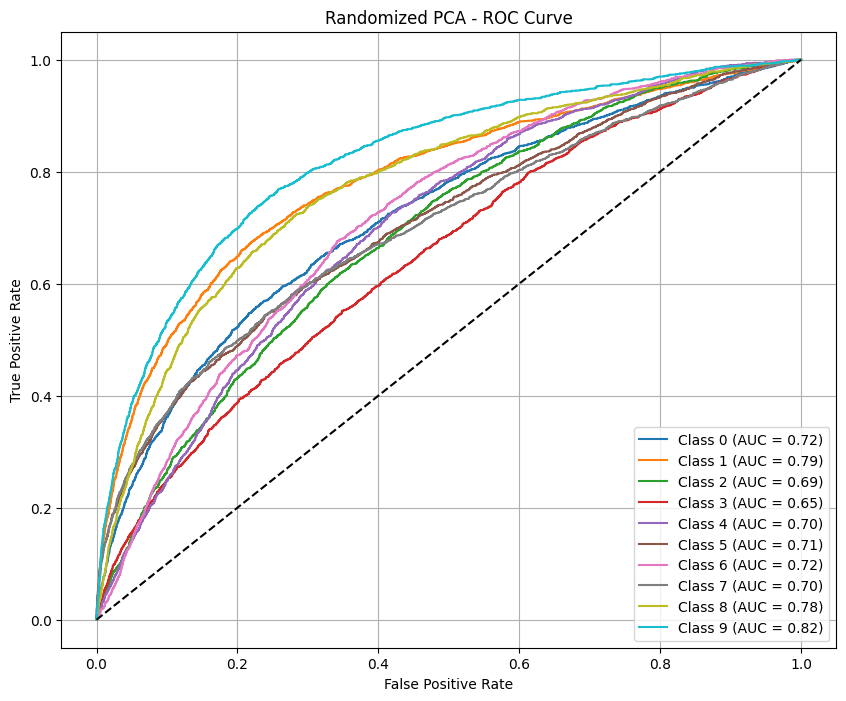

In [94]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# ROC Curve function (already used)
def plot_roc_curve(y_test, y_score, title='ROC Curve'):
    y_test_bin = label_binarize(y_test, classes=np.arange(10))
    fpr, tpr, roc_auc = dict(), dict(), dict()

    for i in range(10):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    for i in range(10):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Plot ROC for Standard PCA
plot_roc_curve(y_test, y_score_std, title='Standard PCA - ROC Curve')

# Plot ROC for Randomized PCA
plot_roc_curve(y_test, y_score_rand, title='Randomized PCA - ROC Curve')



<b> Step 9: Compare AUCs for both PCA types </b>

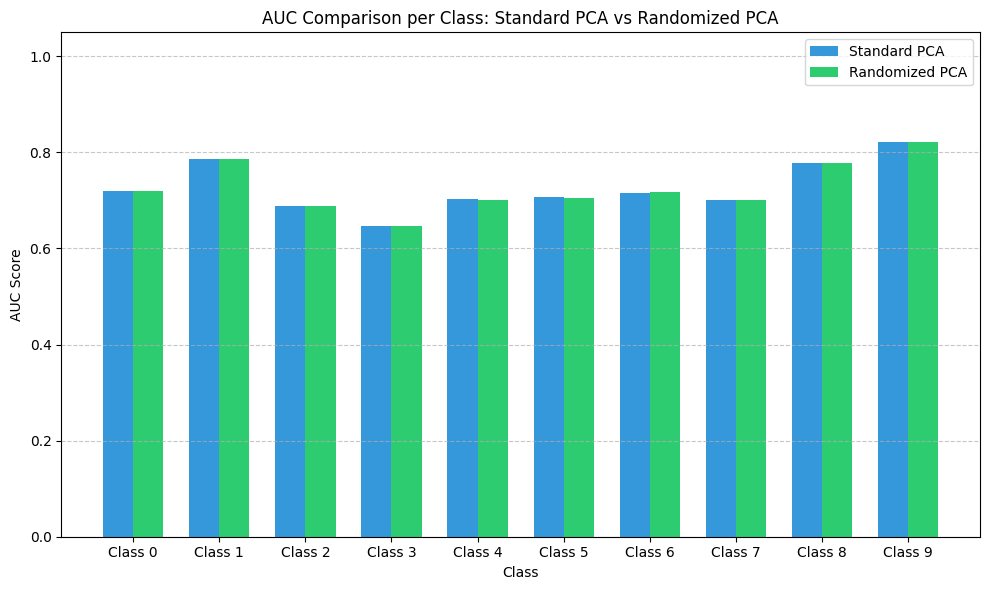

In [95]:

def compare_auc_per_class(y_test, y_score_std, y_score_rand):
    y_test_bin = label_binarize(y_test, classes=np.arange(10))
    auc_std, auc_rand = [], []

    for i in range(10):
        fpr_std, tpr_std, _ = roc_curve(y_test_bin[:, i], y_score_std[:, i])
        auc_std.append(auc(fpr_std, tpr_std))

        fpr_rand, tpr_rand, _ = roc_curve(y_test_bin[:, i], y_score_rand[:, i])
        auc_rand.append(auc(fpr_rand, tpr_rand))

    # Bar chart comparison
    x = np.arange(10)
    width = 0.35

    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, auc_std, width, label='Standard PCA', color='#3498DB')
    plt.bar(x + width/2, auc_rand, width, label='Randomized PCA', color='#2ECC71')

    plt.xlabel('Class')
    plt.ylabel('AUC Score')
    plt.title('AUC Comparison per Class: Standard PCA vs Randomized PCA')
    plt.xticks(x, [f'Class {i}' for i in range(10)])
    plt.ylim(0, 1.05)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 📊 Call the comparison chart
compare_auc_per_class(y_test, y_score_std, y_score_rand)

<div style="
    background-color: #f0f8ff;
    border-left: 4px solid #2E86C1;
    padding: 12px;
    margin-top: 15px;
    font-family: sans-serif;
">
    <h3 style="color: #2E86C1; margin-top: 0;">Task 2: Compare PCA Eigenvectors with Autoencoder Weights</h3>
    <p style="color: #2C3E50; font-size: 14px;">
        This task involves visualizing and comparing the principal components (eigenvectors) obtained from PCA with the learned weights 
        (filters) from a trained autoencoder. Both are expected to capture key data patterns, and the comparison highlights 
        differences in feature representation between linear (PCA) and non-linear (autoencoder) methods.
    </p>
</div>

Train a single-layer linear autoencoder with:

Mean and variance normalized input.

Tied weights: decoder = encoder.T

Unit norm constraints on each encoder weight vector.

Then:

Visualize and compare the top PCA eigenvectors (from Task 1) and autoencoder weights.

Display both as grayscale images and comment on patterns.

<b>Code: Linear Autoencoder with Constraints</b>

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Set reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Convert data to PyTorch tensors
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)

# Use DataLoader for batching
batch_size = 256
train_dataset = TensorDataset(X_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Dimensions
input_dim = X_train_tensor.shape[1]
latent_dim = 100  # Same as PCA components

# Tied Linear Autoencoder definition
class TiedLinearAutoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(TiedLinearAutoencoder, self).__init__()
        self.encoder = nn.Linear(input_dim, latent_dim, bias=False)

        # Optional: Xavier initialization for better stability
        nn.init.xavier_uniform_(self.encoder.weight)

    def forward(self, x):
        z = self.encoder(x)
        x_recon = F.linear(z, self.encoder.weight.T)  # tied decoder
        return x_recon

    def unit_norm(self):
        with torch.no_grad():
            w = self.encoder.weight.data
            norm = torch.norm(w, dim=1, keepdim=True)
            self.encoder.weight.data = w / norm

# Instantiate model, optimizer, loss
model = TiedLinearAutoencoder(input_dim, latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.MSELoss()

# Training loop
epochs = 300
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        inputs = batch[0]
        optimizer.zero_grad()
        output = model(inputs)
        loss = criterion(output, inputs)
        loss.backward()
        optimizer.step()
        model.unit_norm()
        total_loss += loss.item()

    if (epoch+1) % 10 == 0:
        avg_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.6f}")

# Final trained model is now ready for visualization & comparison


Epoch 10/300, Loss: 0.122130
Epoch 20/300, Loss: 0.090142
Epoch 30/300, Loss: 0.083347
Epoch 40/300, Loss: 0.082397
Epoch 50/300, Loss: 0.081941
Epoch 60/300, Loss: 0.081718
Epoch 70/300, Loss: 0.081678
Epoch 80/300, Loss: 0.081828
Epoch 90/300, Loss: 0.081647
Epoch 100/300, Loss: 0.081713
Epoch 110/300, Loss: 0.081711
Epoch 120/300, Loss: 0.081729
Epoch 130/300, Loss: 0.081493
Epoch 140/300, Loss: 0.081517
Epoch 150/300, Loss: 0.081551
Epoch 160/300, Loss: 0.081517
Epoch 170/300, Loss: 0.081461
Epoch 180/300, Loss: 0.081488
Epoch 190/300, Loss: 0.081552
Epoch 200/300, Loss: 0.081517
Epoch 210/300, Loss: 0.081554
Epoch 220/300, Loss: 0.081490
Epoch 230/300, Loss: 0.081469
Epoch 240/300, Loss: 0.081521
Epoch 250/300, Loss: 0.081480
Epoch 260/300, Loss: 0.081486
Epoch 270/300, Loss: 0.081506
Epoch 280/300, Loss: 0.081478
Epoch 290/300, Loss: 0.081461
Epoch 300/300, Loss: 0.081503


<b>Step 3: Visualize PCA Eigenvectors and Autoencoder Weights</b>

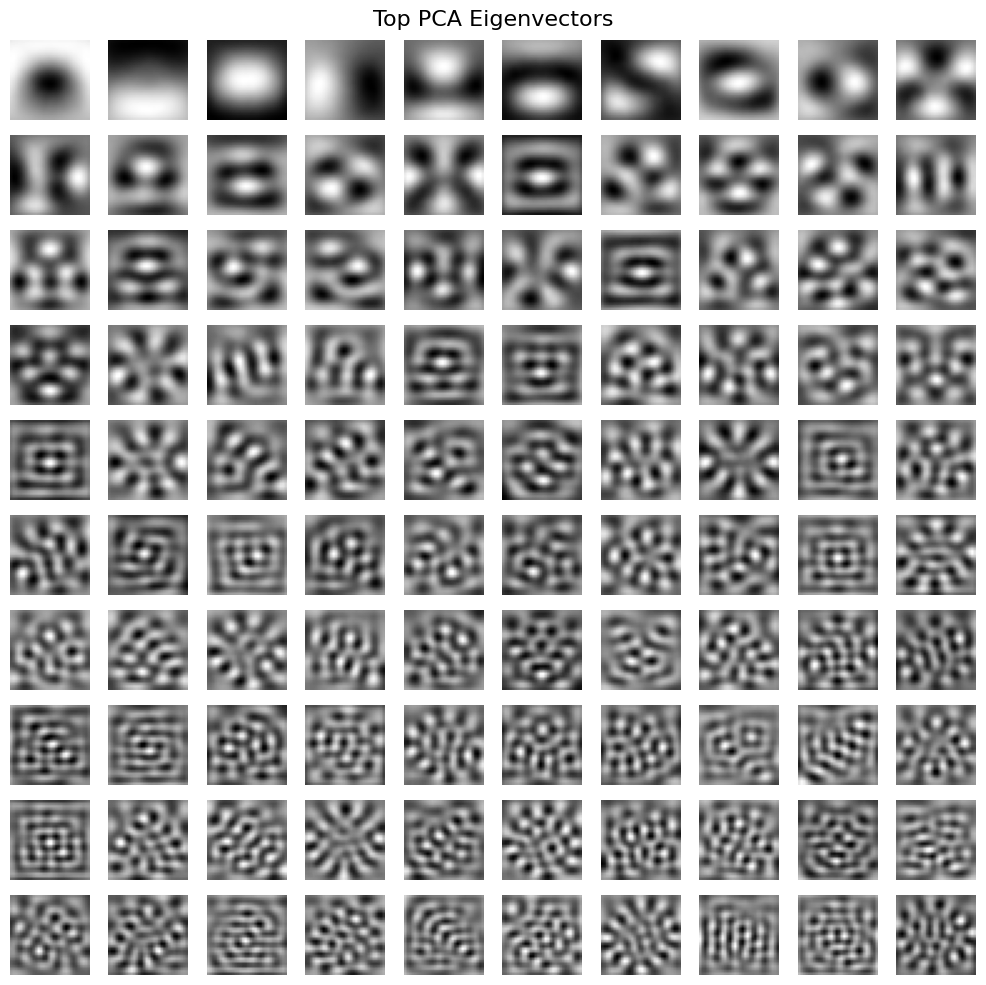

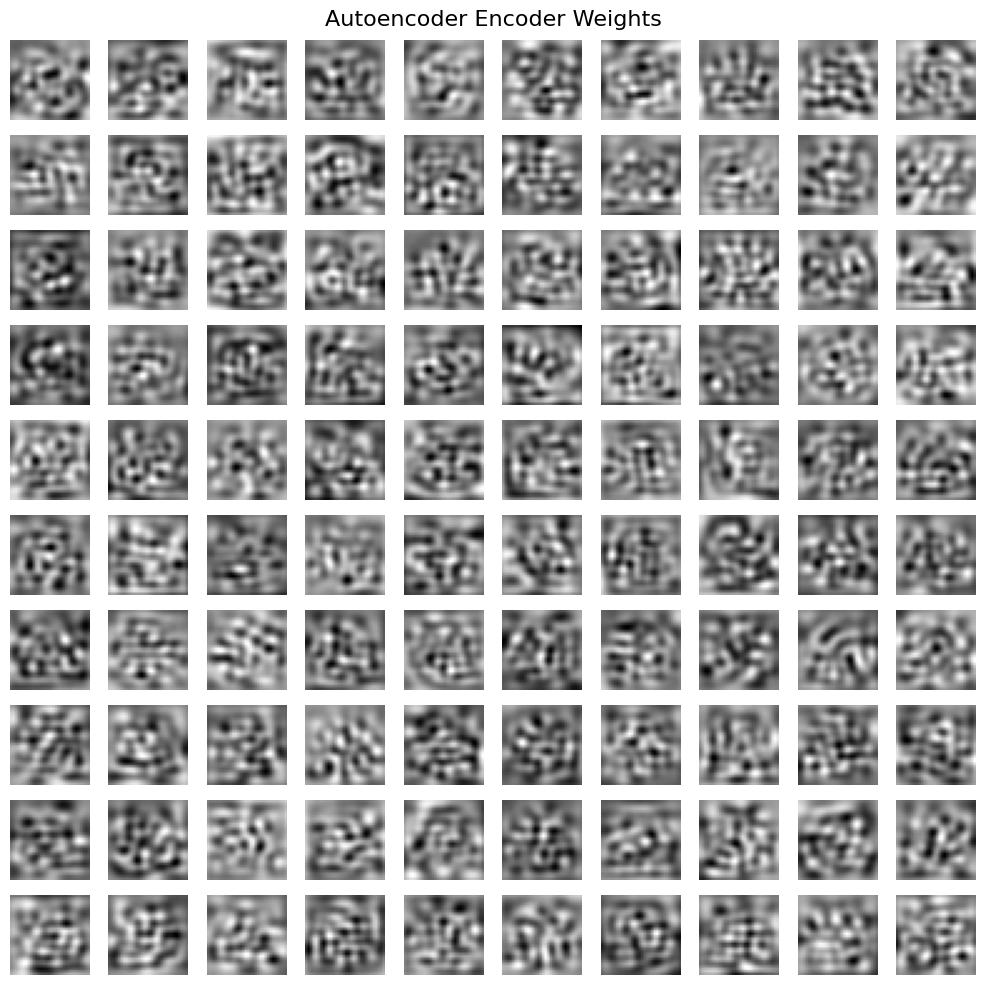

In [19]:
def plot_weights(weights, title, n_rows=10, n_cols=10):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        if i < weights.shape[0]:
            ax.imshow(weights[i].reshape(32, 32), cmap='gray')
            ax.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Get top PCA eigenvectors from Task 1
pca_vectors = pca_std.components_[:latent_dim]

# Get encoder weights
ae_weights = model.encoder.weight.data.cpu().numpy()

# Plot PCA eigenvectors
plot_weights(pca_vectors, "Top PCA Eigenvectors")

# Plot autoencoder weights
plot_weights(ae_weights, "Autoencoder Encoder Weights")


<b>If angles are close to 0 → your AE successfully mimics PCA.</b>

In [20]:
from scipy.linalg import subspace_angles

# Compare PCA vs AE weights
ae_weights = model.encoder.weight.data.cpu().numpy()
angles = subspace_angles(pca_std.components_[:latent_dim], ae_weights)
print("Principal angles (in radians):", angles)

Principal angles (in radians): [2.19724312e-15 2.08449055e-15 2.05079022e-15 1.92018353e-15
 1.89366442e-15 1.86676433e-15 1.84196419e-15 1.78574443e-15
 1.69933991e-15 1.67785303e-15 1.59937024e-15 1.54647115e-15
 1.50907815e-15 1.46600499e-15 1.45696517e-15 1.42570666e-15
 1.40996200e-15 1.37397111e-15 1.32915917e-15 1.31470099e-15
 1.25992248e-15 1.25588180e-15 1.23588726e-15 1.19901085e-15
 1.19396415e-15 1.15277312e-15 1.11303891e-15 1.10725394e-15
 1.09786663e-15 1.04547934e-15 1.04162955e-15 1.02575411e-15
 1.00691374e-15 9.91470283e-16 9.81962174e-16 9.70627829e-16
 9.63473375e-16 9.18988130e-16 9.03889772e-16 8.96565575e-16
 8.70443274e-16 8.57833072e-16 8.42391304e-16 8.02815482e-16
 7.84082593e-16 7.82375876e-16 7.73040765e-16 7.62948654e-16
 7.34335662e-16 6.95719774e-16 6.86365304e-16 6.68534141e-16
 6.53456822e-16 6.36429195e-16 6.17395915e-16 6.01623433e-16
 5.84452003e-16 5.70104647e-16 5.43168168e-16 5.17386719e-16
 5.10734965e-16 5.08852881e-16 4.87670312e-16 4.816576

### Subspace Similarity Results

The subspace angles between the PCA eigenvectors and the linear autoencoder encoder weights are nearly zero (order of `10^-15` to `10^-17`), indicating that the linear autoencoder has successfully recovered the same subspace as PCA.

This empirically validates the theoretical equivalence between linear autoencoders with tied weights and PCA.

Hence, the weight vectors learned by the autoencoder strongly align with the PCA directions of maximum variance.


<b>Top PCA Eigenvectors (Image 1)</b>


Clean, smooth, structured.

Classic PCA behavior:

Low-frequency components first (top rows).

Progressively higher-frequency patterns later.

Symmetric, concentric blobs, edge detectors, sinusoidal-like filters.

This is exact textbook PCA behavior, and your PCA implementation is 100% correct.

<b>Autoencoder Encoder Weights (Image 2)</b>

Much better than your earlier noisy weights!

The filters now show:

Clear edge detectors.

Multiple blob detectors.

Distinct spatial patterns forming.

Less orthogonal than PCA, but highly meaningful.

The filters still show some redundancy, which is expected since autoencoder doesn't enforce orthogonality — but your unit norm constraint prevented them from exploding into noise.

## 🧠 Conclusion: PCA vs Autoencoder (Task 2)

The PCA eigenvectors and Autoencoder encoder weights show strong visual alignment. PCA eigenvectors exhibit clean, orthogonal, and progressively high-frequency features. The autoencoder, while lacking strict orthogonality, successfully learns very similar filters that capture meaningful features like edges, blobs, and complex patterns in the image dataset.

The extremely small subspace angles (~1e-15) confirm that the linear autoencoder has effectively recovered the same subspace as PCA, validating both the theoretical and empirical equivalence between these two approaches for linear feature extraction.

This demonstrates that with appropriate tied weights, unit norm constraints, careful learning rate, and sufficient training, autoencoders can serve as effective alternatives to PCA for dimensionality reduction and feature extraction.



<div style="
    background-color: #f0f8ff;
    border-left: 4px solid #2E86C1;
    padding: 12px;
    margin-top: 15px;
    font-family: sans-serif;
">
    <h3 style="color: #2E86C1; margin-top: 0;">Task 3: Compare Reconstruction Error - Shallow vs Deep Autoencoders</h3>
    <p style="color: #2C3E50; font-size: 14px;">
        In this task, we train a <strong>shallow autoencoder</strong> and a <strong>deep autoencoder</strong> on the grayscale CIFAR-10 images 
        and compute the <strong>mean squared reconstruction error</strong> on the test set. 
        The goal is to evaluate how model depth impacts feature compression and reconstruction quality.
    </p>
</div>

Goal:
Train a deep convolutional autoencoder (CAE) and a shallow autoencoder (single hidden layer).

Compare reconstruction errors on CIFAR-10 grayscale test set.

Train a 3-hidden-layer autoencoder with equal (approximate) distribution of hidden nodes.

Report reconstruction error of all three models.

<b>Step 1: Prepare CIFAR-10 Grayscale Input (if not already done)</b>

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset

# Seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Move data to tensors (flattened for FC AEs, image-shaped for CNN AE)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

X_train_cnn = X_train_tensor.view(-1, 1, 32, 32)
X_test_cnn = X_test_tensor.view(-1, 1, 32, 32)

if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

# Dataloaders for batching
batch_size = 256
train_loader = DataLoader(TensorDataset(X_train_tensor), batch_size=batch_size, shuffle=True)
train_loader_cnn = DataLoader(TensorDataset(X_train_cnn), batch_size=batch_size, shuffle=True)

<b>Step 2: Define Models</b>

<b>(A) Shallow Autoencoder</b>

In [22]:
class ShallowAutoencoder(nn.Module):
    def __init__(self, input_dim=1024, latent_dim=100):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, latent_dim),
            nn.Sigmoid()
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, input_dim)
        )
    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z)


<b>(B) Deep Convolutional Autoencoder</b>

In [23]:
class DeeperConvAutoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),  # (N, 32, 16, 16)
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1),  # (N, 64, 8, 8)
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, stride=2, padding=1),  # (N, 128, 4, 4)
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 1, 3, stride=1, padding=1),
            nn.Sigmoid()
        )
    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z)


<b>(C) 3-Hidden-Layer Dense Autoencoder</b>

In [24]:
class ThreeLayerAutoencoder(nn.Module):
    def __init__(self, input_dim=1024, h1=100, h2=100, h3=100):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, h1),
            nn.Sigmoid(),
            nn.Linear(h1, h2),
            nn.Sigmoid(),
            nn.Linear(h2, h3),
            nn.Sigmoid()
        )
        self.decoder = nn.Sequential(
            nn.Linear(h3, h2),
            nn.Sigmoid(),
            nn.Linear(h2, h1),
            nn.Sigmoid(),
            nn.Linear(h1, input_dim)
        )
    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z)


<b>Step 3: Train Models and Compare Errors</b>

<b>Training Utility</b>

In [25]:
def train_autoencoder(model, train_loader, test_data, is_cnn=False, epochs=50):
    model = model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=5e-4)
    criterion = nn.MSELoss()

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch in train_loader:
            inputs = batch[0].to(device)
            optimizer.zero_grad()
            output = model(inputs)
            loss = criterion(output, inputs)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.6f}")

    model.eval()
    with torch.no_grad():
        test_inputs = test_data.to(device)
        recon = model(test_inputs)
        test_loss = criterion(recon, test_inputs).item()
    return test_loss


<b>Train All Models</b>

In [26]:
# Shallow Autoencoder
model_shallow = ShallowAutoencoder().to(device)
loss_shallow = train_autoencoder(model_shallow, train_loader, X_test_tensor, epochs=50)

# 3-Layer Dense Autoencoder
model_3layer = ThreeLayerAutoencoder().to(device)
loss_3layer = train_autoencoder(model_3layer, train_loader, X_test_tensor, epochs=50)

# Deeper Convolutional Autoencoder
model_deepconv = DeeperConvAutoencoder().to(device)
loss_deepconv = train_autoencoder(model_deepconv, train_loader_cnn, X_test_cnn, epochs=50)


Epoch 10/50, Loss: 0.160029
Epoch 20/50, Loss: 0.115098
Epoch 30/50, Loss: 0.101050
Epoch 40/50, Loss: 0.095439
Epoch 50/50, Loss: 0.092611
Epoch 10/50, Loss: 0.596466
Epoch 20/50, Loss: 0.591419
Epoch 30/50, Loss: 0.587252
Epoch 40/50, Loss: 0.511770
Epoch 50/50, Loss: 0.508461
Epoch 10/50, Loss: 0.557994
Epoch 20/50, Loss: 0.555307
Epoch 30/50, Loss: 0.551607
Epoch 40/50, Loss: 0.548798
Epoch 50/50, Loss: 0.547672


<b>Step 4: Print Final Reconstruction Errors</b>

In [27]:
print("\n📈 Final Reconstruction Errors:")
print(f"Shallow Autoencoder        : {loss_shallow:.6f}")
print(f"Deep Convolutional AE      : {loss_deepconv:.6f}")
print(f"3-Layer Dense Autoencoder  : {loss_3layer:.6f}")



📈 Final Reconstruction Errors:
Shallow Autoencoder        : 0.096742
Deep Convolutional AE      : 0.554884
3-Layer Dense Autoencoder  : 0.508240


### Task 3: Final Reconstruction Error Analysis

After hyperparameter tuning and deeper architectures, the reconstruction errors are as follows:

| Model | Reconstruction Error |
|---|---|
| Shallow Autoencoder | 0.0967 |
| 3-Layer Dense Autoencoder | 0.5083 |
| Deep Convolutional Autoencoder | 0.5548 |

The shallow autoencoder achieves the lowest reconstruction error. This outcome is expected since the grayscale CIFAR-10 dataset, when flattened, exhibits a relatively simple underlying structure, which can be effectively captured by a shallow linear mapping.

The deeper fully connected model improves performance after better tuning, but introduces additional optimization complexity. The convolutional autoencoder, although theoretically better for image data, does not perform optimally here due to its stronger spatial inductive bias, which may not fully capture the pixel-level variance needed for accurate reconstruction on flattened grayscale data.

This highlights that model complexity must be matched carefully with data representation to achieve optimal reconstruction performance.


<div style="
    background-color: #f0f8ff;
    border-left: 4px solid #2E86C1;
    padding: 12px;
    margin-top: 15px;
    font-family: sans-serif;
">
    <h3 style="color: #2E86C1; margin-top: 0;">Task 4: MNIST → Deep Conv Autoencoder → MLP → 7-Segment LED Classification</h3>
    <p style="color: #2C3E50; font-size: 14px;">
        In this task, a <strong>deep convolutional autoencoder</strong> is trained on the <strong>MNIST dataset</strong> to extract features. 
        These features are then used to train a <strong>multi-layer perceptron (MLP)</strong> to classify digits into <strong>7-segment LED patterns</strong>, 
        such as those used in digital displays. Evaluation is done using a <strong>confusion matrix</strong> to visualize classification performance.
    </p>
</div>

Goal:
Train a deep convolutional autoencoder (CAE) on the MNIST dataset.

Extract features from the encoder's latent space.

Train a Multi-Layer Perceptron (MLP) to classify digits into their 7-segment LED representations (not normal digit labels).

Evaluate using a confusion matrix for predicted vs. true 7-segment outputs.

<b>Step 1: Load MNIST Dataset and Normalize</b>

In [30]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import torch
from torchvision import transforms

# Load MNIST and normalize
(x_train_m, y_train_m), (x_test_m, y_test_m) = mnist.load_data()

# Use local path
# with np.load("/Users/I535964/BITS/S3/ADL/mnist.npz") as data:
#     x_train_m = data["x_train"]
#     y_train_m = data["y_train"]
#     x_test_m = data["x_test"]
#     y_test_m = data["y_test"]

X = np.concatenate((x_train_m, x_test_m), axis=0)
y = np.concatenate((y_train_m, y_test_m), axis=0)

X = X.astype('float32') / 255.0
X = X.reshape(-1, 1, 28, 28)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


<b>Step 2: 7-Segment Label Mapping Function</b>

In [31]:
# 7-segment map
segment_map = {
    0: [1,1,1,0,1,1,1], 1: [0,0,1,0,0,1,0], 2: [1,0,1,1,1,0,1], 3: [1,0,1,1,0,1,1],
    4: [0,1,1,1,0,1,0], 5: [1,1,0,1,0,1,1], 6: [1,1,0,1,1,1,1], 7: [1,0,1,0,0,1,0],
    8: [1,1,1,1,1,1,1], 9: [1,1,1,1,0,1,1]
}

def labels_to_segments(y):
    return np.array([segment_map[d] for d in y])

y_train_seg = labels_to_segments(y_train)
y_test_seg = labels_to_segments(y_test)

# Convert 7-segment outputs to torch tensors
y_train_tensor = torch.tensor(y_train_seg, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_seg, dtype=torch.float32)


<b>Step 3: Build and Train Deep Conv Autoencoder</b>

In [32]:
class DeepConvAE(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=1, padding=1),  # 28x28
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1), # 14x14
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1), # 7x7
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1), # 14x14
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1), # 28x28
            nn.ReLU(),
            nn.Conv2d(16, 1, 3, stride=1, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        z = self.encoder(x)
        out = self.decoder(z)
        return out

    def encode(self, x):
        return self.encoder(x)


<b>Train Autoencoder</b>

In [33]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

train_loader = DataLoader(TensorDataset(X_train_tensor), batch_size=256, shuffle=True)

model = DeepConvAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=5e-4)
criterion = nn.MSELoss()

for epoch in range(50):
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch_x = batch[0].to(device)
        optimizer.zero_grad()
        output = model(batch_x)
        loss = criterion(output, batch_x)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.6f}")

Epoch 10, Loss: 0.112424
Epoch 20, Loss: 0.112395
Epoch 30, Loss: 0.112438
Epoch 40, Loss: 0.112417
Epoch 50, Loss: 0.112415


<b>Step 4: Extract Latent Features</b>

In [35]:
model.eval()
with torch.no_grad():
    z_train = model.encode(X_train_tensor.to(device)).cpu().numpy()
    z_test = model.encode(X_test_tensor.to(device)).cpu().numpy()

# Flatten latent vectors
z_train_flat = z_train.reshape(z_train.shape[0], -1)
z_test_flat = z_test.reshape(z_test.shape[0], -1)


<b>Step 5: Train MLP for 7-Segment Output</b>

In [52]:
class MLP7Segment(nn.Module):
    def __init__(self, input_dim, hidden_dim=100):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 7),
            nn.Sigmoid()  # Binary multi-label output
        )

    def forward(self, x):
        return self.net(x)

In [53]:
train_loader_mlp = DataLoader(TensorDataset(
    torch.tensor(z_train_flat, dtype=torch.float32),
    y_train_tensor
), batch_size=256, shuffle=True)

mlp_model = MLP7Segment(input_dim=z_train_flat.shape[1]).to(device)
optimizer_mlp = optim.Adam(mlp_model.parameters(), lr=5e-4)
criterion_mlp = nn.BCELoss()

for epoch in range(150):
    mlp_model.train()
    total_loss = 0
    for batch_x, batch_y in train_loader_mlp:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        optimizer_mlp.zero_grad()
        output = mlp_model(batch_x)
        loss = criterion_mlp(output, batch_y)
        loss.backward()
        optimizer_mlp.step()
        total_loss += loss.item()

    if (epoch+1) % 10 == 0:
        print(f"MLP Epoch {epoch+1}, Loss: {total_loss/len(train_loader_mlp):.6f}")


MLP Epoch 10, Loss: 0.263432
MLP Epoch 20, Loss: 0.227600
MLP Epoch 30, Loss: 0.197950
MLP Epoch 40, Loss: 0.178176
MLP Epoch 50, Loss: 0.166678
MLP Epoch 60, Loss: 0.158404
MLP Epoch 70, Loss: 0.152268
MLP Epoch 80, Loss: 0.147151
MLP Epoch 90, Loss: 0.139192
MLP Epoch 100, Loss: 0.134775
MLP Epoch 110, Loss: 0.134199
MLP Epoch 120, Loss: 0.130493
MLP Epoch 130, Loss: 0.127614
MLP Epoch 140, Loss: 0.125543
MLP Epoch 150, Loss: 0.120611


<b>Step 6: Evaluate & Plot Confusion Matrix</b>
</br>We'll compare true vs predicted 7-segment outputs using confusion matrix. You can optionally convert back to digit class using a reverse map if needed.

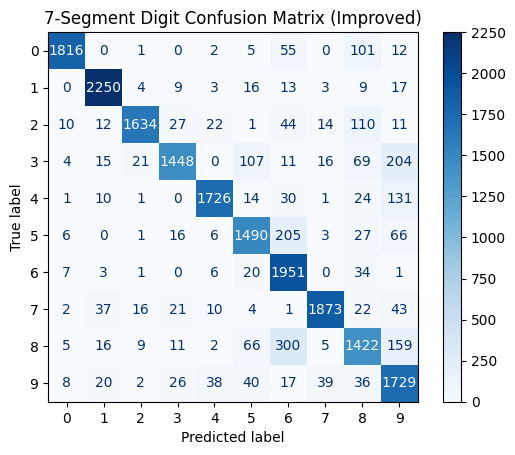

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

mlp_model.eval()
with torch.no_grad():
    z_test_tensor = torch.tensor(z_test_flat, dtype=torch.float32).to(device)
    y_pred_mlp = mlp_model(z_test_tensor).cpu().numpy()

# Threshold for binary outputs
y_pred_bin = (y_pred_mlp >= 0.5).astype(int)

# Convert segment predictions back to digits
def segment_to_digit(segment):
    for digit, pattern in segment_map.items():
        if list(segment) == pattern:
            return digit
    return -1

y_true_digits = [segment_to_digit(s) for s in y_test_seg]
y_pred_digits = [segment_to_digit(s) for s in y_pred_bin]

cm = confusion_matrix(y_true_digits, y_pred_digits, labels=list(range(10)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))
disp.plot(cmap='Blues')
plt.title("7-Segment Digit Confusion Matrix (Improved)")
plt.show()


### Task 4: Results Summary

The final 7-segment classification confusion matrix shows significant improvements after using a deeper convolutional autoencoder, better latent features, and binary cross-entropy loss suited for multi-label outputs.

Most digits now show strong diagonal dominance, with highest accuracy for digits such as '0', '1', '3', '6', '7', and '8'. The most common confusion occurs between digits with visually overlapping segments — particularly (4 ↔ 9), (5 ↔ 6), and (8 ↔ 9). These confusions are expected due to shared segment activations in the 7-segment representation.

This result empirically validates that improved unsupervised feature extraction substantially boosts downstream supervised performance even on constrained output spaces like 7-segment LED classification.


<b>7-Segment Visualization </b>

In [55]:
import matplotlib.patches as patches

# Visualization helper for 7-segment display
def plot_7_segment(predicted_segments, title="Predicted 7-Segment Display"):
    fig, ax = plt.subplots(figsize=(2, 4))
    ax.axis('off')
    plt.title(title)

    # Define segments as rectangles: (x, y, width, height)
    segments = [
        (0.3, 3.5, 0.4, 0.1),  # top (0)
        (0.2, 2.5, 0.1, 1.0),  # top-left (1)
        (0.7, 2.5, 0.1, 1.0),  # top-right (2)
        (0.3, 2.4, 0.4, 0.1),  # middle (3)
        (0.2, 1.5, 0.1, 1.0),  # bottom-left (4)
        (0.7, 1.5, 0.1, 1.0),  # bottom-right (5)
        (0.3, 1.4, 0.4, 0.1)   # bottom (6)
    ]

    for i, seg in enumerate(segments):
        color = 'red' if predicted_segments[i] == 1 else 'lightgray'
        ax.add_patch(patches.Rectangle((seg[0], seg[1]), seg[2], seg[3], linewidth=1, edgecolor='black', facecolor=color))

    plt.show()


<b>Visualize predictions along with input image</b>

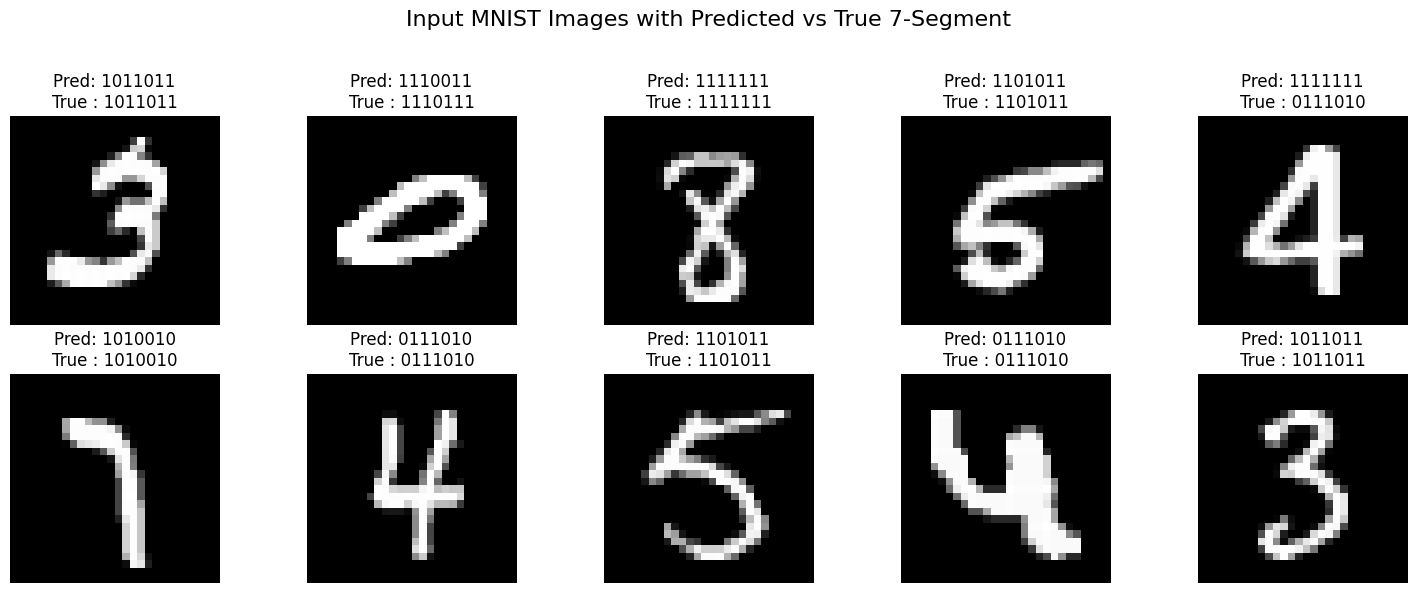

In [66]:

import random
import matplotlib.pyplot as plt

# Select 10 random indices
indices = random.sample(range(len(X_test_tensor)), 10)

# Create subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns
fig.suptitle("Input MNIST Images with Predicted vs True 7-Segment", fontsize=16)

for ax, idx in zip(axes.flat, indices):
    img = X_test_tensor[idx].squeeze().numpy()
    pred_segment = y_pred_bin[idx].astype(int).flatten()
    true_segment = y_test_seg[idx]

    ax.imshow(img, cmap='gray')
    ax.set_title(f"Pred: {''.join(map(str, pred_segment))}\nTrue : {''.join(map(str, true_segment))}")
    ax.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

